# Kasra Tookallo


# Data Analysis


## Import Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## Data Visualisation

<div dir="rtl">
توضیحات:
<ul>
<li>نام شهر</li>
<li>طول جغرافیایی(شرقی + ، غربی -)</li>
<li>عرض جغرافیایی(شمالی + ، جنوبی -) </li>
<li>جمعیت(1/100000)</li>

</ul>
</div>

## Raw Data


In [16]:
Tehran = pd.array([{"longitude": [51, 23]}, {"lattitude": [35, 41]}, {"population": 9_039_000}])
Mashhad = pd.array([{"longitude": [59, 32]}, {"lattitude": [36, 19 ]}, {"population": 3_002_000}])
Esfahan = pd.array([{"longitude": [51, 40]}, {"lattitude": [32, 38 ]}, {"population": 1_961_000}])
Karaj = pd.array([{"longitude": [50, 59]}, {"lattitude": [35, 49 ]}, {"population": 1_592_000}])
Shiraz = pd.array([{"longitude": [52, 32]}, {"lattitude": [29, 37 ]}, {"population": 1_565_000}])
Tabriz = pd.array([{"longitude": [46, 17]}, {"lattitude": [37, 4 ]}, {"population": 1_558_000}])
Qom = pd.array([{"longitude": [50, 52]}, {"lattitude": [34, 38 ]}, {"population": 1_201_000}])
Ahvaz = pd.array([{"longitude": [48, 41]}, {"lattitude": [31, 19 ]}, {"population": 1_184_000}])
Kermanshah = pd.array([{"longitude": [47, 4]}, {"lattitude": [34,19 ]}, {"population": 946_000}])
Orumieh = pd.array([{"longitude": [45,4]}, {"lattitude": [37, 32 ]}, {"population": 736_000}])


### Data Cleaning


In [17]:
data = [
    {"city": "Tehran", "longitude": [51, 23], "latitude": [35, 41], "population": 9_039_000},
    {"city": "Mashhad", "longitude": [59, 32], "latitude": [36, 19], "population": 3_002_000},
    {"city": "Esfahan", "longitude": [51, 40], "latitude": [32, 38], "population": 1_961_000},
    {"city": "Karaj", "longitude": [50, 59], "latitude": [35, 49], "population": 1_592_000},
    {"city": "Shiraz", "longitude": [52, 32], "latitude": [29, 37], "population": 1_565_000},
    {"city": "Tabriz", "longitude": [46, 17], "latitude": [37, 4], "population": 1_558_000},
    {"city": "Qom", "longitude": [50, 52], "latitude": [34, 38], "population": 1_201_000},
    {"city": "Ahvaz", "longitude": [48, 41], "latitude": [31, 19], "population": 1_184_000},
    {"city": "Kermanshah", "longitude": [47, 4], "latitude": [34, 19], "population": 946_000},
    {"city": "Orumieh", "longitude": [45, 4], "latitude": [37, 32], "population": 736_000}
]
data

[{'city': 'Tehran',
  'longitude': [51, 23],
  'latitude': [35, 41],
  'population': 9039000},
 {'city': 'Mashhad',
  'longitude': [59, 32],
  'latitude': [36, 19],
  'population': 3002000},
 {'city': 'Esfahan',
  'longitude': [51, 40],
  'latitude': [32, 38],
  'population': 1961000},
 {'city': 'Karaj',
  'longitude': [50, 59],
  'latitude': [35, 49],
  'population': 1592000},
 {'city': 'Shiraz',
  'longitude': [52, 32],
  'latitude': [29, 37],
  'population': 1565000},
 {'city': 'Tabriz',
  'longitude': [46, 17],
  'latitude': [37, 4],
  'population': 1558000},
 {'city': 'Qom',
  'longitude': [50, 52],
  'latitude': [34, 38],
  'population': 1201000},
 {'city': 'Ahvaz',
  'longitude': [48, 41],
  'latitude': [31, 19],
  'population': 1184000},
 {'city': 'Kermanshah',
  'longitude': [47, 4],
  'latitude': [34, 19],
  'population': 946000},
 {'city': 'Orumieh',
  'longitude': [45, 4],
  'latitude': [37, 32],
  'population': 736000}]

## Organized Data

In [18]:
data = {
    "City": ["Tehran", "Mashhad", "Esfahan", "Karaj", "Shiraz", "Tabriz", "Qom", "Ahvaz", "Kermanshah", "Orumieh"],
    "Longitude_Deg": [51, 59, 51, 50, 52, 46, 50, 48, 47, 45],
    "Longitude_Min": [23, 32, 40, 59, 32, 17, 52, 41, 4, 4],
    "Latitude_Deg": [35, 36, 32, 35, 29, 37, 34, 31, 34, 37],
    "Latitude_Min": [41, 19, 38, 49, 37, 4, 38, 19, 19, 32],
    "Population": [9039000, 3002000, 1961000, 1592000, 1565000, 1558000, 1201000, 1184000, 946000, 736000]
}
df = pd.DataFrame(data)
df


,City,Longitude_Deg,Longitude_Min,Latitude_Deg,Latitude_Min,Population
0,Tehran,51,23,35,41,9039000
1,Mashhad,59,32,36,19,3002000
2,Esfahan,51,40,32,38,1961000
3,Karaj,50,59,35,49,1592000
4,Shiraz,52,32,29,37,1565000
5,Tabriz,46,17,37,4,1558000
6,Qom,50,52,34,38,1201000
7,Ahvaz,48,41,31,19,1184000
8,Kermanshah,47,4,34,19,946000
9,Orumieh,45,4,37,32,736000


### Data Scaling

In [19]:
# تبدیل درجه و دقیقه به درجه اعشاری (ثانیه = 0)
# convert Longitude and Latitude to X,y
def dms_to_decimal(d, m, s=0):
    return d + m / 60.0 + s / 3600.0
rows = []
for row in data:
    lon_dec = dms_to_decimal(df['Longitude_Deg'], df['Longitude_Min'])
    lat_dec = dms_to_decimal(df['Latitude_Deg'], df['Latitude_Min'])
    rows.append({
        "city": df["City"],
        "lon": lon_dec,
        "lat": lat_dec,
        "population": df["Population"]
    })
rows = {
    "City": ["Tehran", "Mashhad", "Esfahan", "Karaj", "Shiraz", "Tabriz", "Qom", "Ahvaz", "Kermanshah", "Orumieh"],
    "Longitude": [51.383333, 59.533333, 51.666667, 50.983333, 52.533333, 46.283333, 50.866667, 48.683333, 47.066667, 45.066667],
    "Latitude": [35.683333, 36.316667, 32.633333, 35.816667, 29.616667, 37.066667, 34.633333, 31.316667, 34.316667, 37.533333,],
    "Population": [9039000, 3002000, 1961000, 1592000, 1565000, 1558000, 1201000, 1184000, 946000, 736000]
}
df = pd.DataFrame(rows)
df

,City,Longitude,Latitude,Population
0,Tehran,51.383333,35.683333,9039000
1,Mashhad,59.533333,36.316667,3002000
2,Esfahan,51.666667,32.633333,1961000
3,Karaj,50.983333,35.816667,1592000
4,Shiraz,52.533333,29.616667,1565000
5,Tabriz,46.283333,37.066667,1558000
6,Qom,50.866667,34.633333,1201000
7,Ahvaz,48.683333,31.316667,1184000
8,Kermanshah,47.066667,34.316667,946000
9,Orumieh,45.066667,37.533333,736000


In [20]:
cities = np.array(rows["City"])
lons = np.array(rows["Longitude"])
lats = np.array(rows["Latitude"])
pops = np.array(rows["Population"])
print(cities)
print(lons)
print(lats)
print(pops)

['Tehran' 'Mashhad' 'Esfahan' 'Karaj' 'Shiraz' 'Tabriz' 'Qom' 'Ahvaz'
 'Kermanshah' 'Orumieh']
[51.383333 59.533333 51.666667 50.983333 52.533333 46.283333 50.866667
 48.683333 47.066667 45.066667]
[35.683333 36.316667 32.633333 35.816667 29.616667 37.066667 34.633333
 31.316667 34.316667 37.533333]
[9039000 3002000 1961000 1592000 1565000 1558000 1201000 1184000  946000
  736000]


In [23]:
# Converting longitudes and latitudes to readable x,y
#x, y = m(lons, lats)

x_tehran, y_tehran = m(51.383333,35.683333)
x_mashhad, y_mashhad = m(59.533333,36.316667)
x_esfahan, y_esfahan = m(51.666667,32.633333 )
x_karaj, y_karaj = m(50.983333,35.816667)
x_shiraz, y_shiraz = m(52.533333,29.616667)
x_tabriz, y_tabriz = m(46.283333,37.066667 )
x_qom, y_qom = m(50.866667,34.633333)
x_ahvaz, y_ahvaz = m(48.683333, 31.316667)
x_kermanshah, y_kermanshah = m(47.066667,34.316667)
x_orumieh, y_orumieh = m(45.066667,37.533333)



## Representation

Text(224270.67992292246, 1768118.9738550624, 'Orumieh')

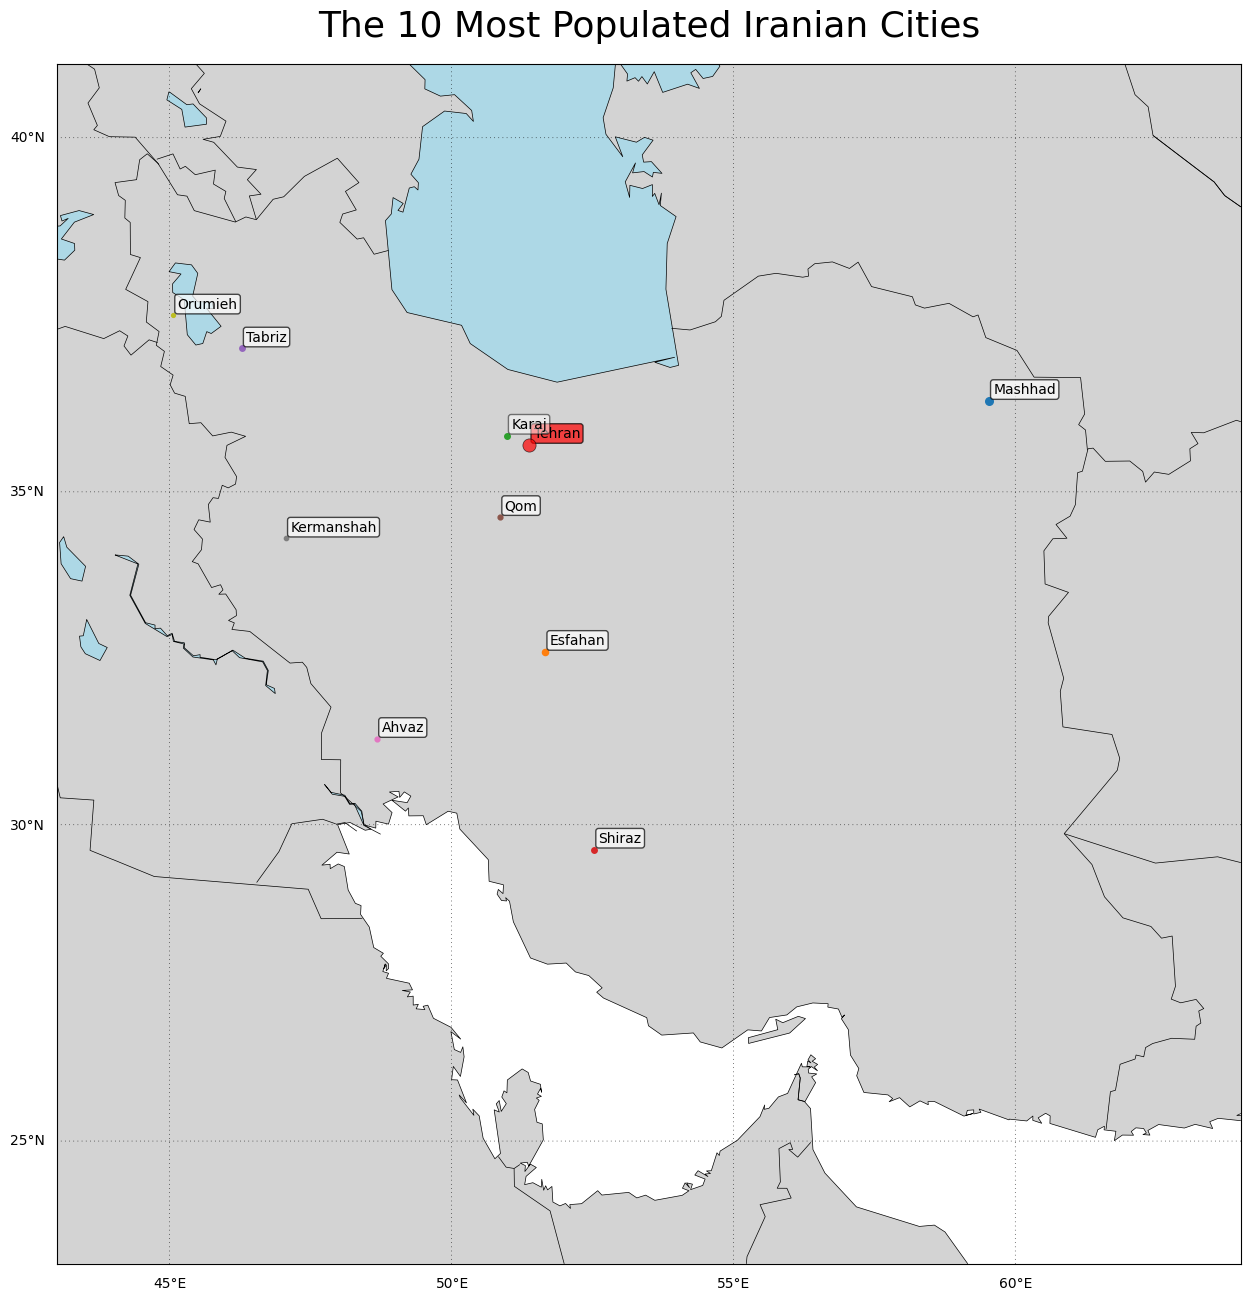

In [24]:
# create Map of Iran
fig = plt.figure(figsize=(20, 15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# # setup mercator map projection.
m = Basemap(llcrnrlon=43., llcrnrlat=23.,
            urcrnrlon=64., urcrnrlat=41,
            rsphere=(6378137.00, 6356752.3142),
            resolution='l', projection='merc',
            lat_0=40., lon_0=-20., lat_ts=20.)

ax.set_title('The 10 Most Populated Iranian Cities', fontsize=26, pad=20)

# Separating Boundaries of the Map
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='lightgray', lake_color='lightblue')
m.drawcountries(linewidth=0.5)
m.drawparallels(np.arange(20, 50, 5), labels=[1,0,0,0], fontsize=10, linewidth=0.5, dashes=[1, 5])
m.drawmeridians(np.arange(40, 75, 5), labels=[0,0,0,1], fontsize=10, linewidth=0.5, dashes=[1, 5])

# draw x,y on the basic map
#scatter = m.scatter(x, y,  c='red', alpha=0.7, edgecolors='black', linewidth=0.5, zorder=5, label='Population')
scatter_tehran = m.scatter(x_tehran,y_tehran, s=90.39, label="Tehran",c='red', alpha=0.7, edgecolors='black', linewidth=0.5, zorder=5)
scatter_mashhad = m.scatter(x_mashhad, y_mashhad, s=30.02)
scatter_esfahan = m.scatter(x_esfahan, y_esfahan, s=19.61)
scatter_karaj = m.scatter(x_karaj, y_karaj, s=15.92)
scatter_shiraz = m.scatter(x_shiraz, y_shiraz, s=15.65)
scatter_tabriz = m.scatter(x_tabriz, y_tabriz, s=15.58)
scatter_qom = m.scatter(x_qom, y_qom, s=12.01)
scatter_ahvaz = m.scatter(x_ahvaz, y_ahvaz, s=11.84)
scatter_kermanshah = m.scatter(x_kermanshah, y_kermanshah, s=9.46)
scatter_orumieh = m.scatter(x_orumieh, y_orumieh, s=7.36)


# Draw Labels
plt.text(x_tehran+8000, y_tehran+8000 , "Tehran", fontsize=10, ha='left', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', facecolor='red', alpha=0.7))
plt.text(x_mashhad+8000, y_mashhad+8000 , "Mashhad", fontsize=10, ha='left', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
plt.text(x_esfahan+8000, y_esfahan+8000 , "Esfahan", fontsize=10, ha='left', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
plt.text(x_karaj+8000 , y_karaj+8000 , "Karaj", fontsize=10, ha='left', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.5))
plt.text(x_shiraz+8000 , y_shiraz+8000 , "Shiraz", fontsize=10, ha='left', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
plt.text(x_tabriz+8000 , y_tabriz+8000 , "Tabriz", fontsize=10, ha='left', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
plt.text(x_qom+8000 , y_qom+8000 , "Qom", fontsize=10, ha='left', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
plt.text(x_ahvaz+8000 , y_ahvaz+8000 , "Ahvaz", fontsize=10, ha='left', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
plt.text(x_kermanshah+8000 , y_kermanshah+8000 , "Kermanshah", fontsize=10, ha='left', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
plt.text(x_orumieh+8000 , y_orumieh+8000 , "Orumieh", fontsize=10, ha='left', va='bottom',
             bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))

# todo (https://matplotlib.org/basemap/stable/users/examples.html#) simply has commanded this Map
